In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

Input = np.array([[0,0],[0,1],[1,0],[1,1]])
Output = np.array([[0],[1],[1],[0]])

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))
def diff_sigmoid(x):
    return x*(1-x)

In [3]:
def predict(X):
    HiddenLayer = np.dot(X, HiddenWeight)
    HiddenLayer += HiddenBias
    Hidden_Layer_Output = sigmoid(HiddenLayer)

    OutputLayer = np.dot(Hidden_Layer_Output, OutputWeight)
    OutputLayer += OutputBias
    predicted = sigmoid(OutputLayer)
    return predicted

2.1) LOG-LOSS FUNCTION FOR THE WHOLE BATCH

In [4]:
epoch = 20000
learning_rate = 0.1
HiddenWeight = np.random.uniform(size=(2,2))
HiddenBias = np.random.uniform(size=(1,2))
OutputWeight = np.random.uniform(size=(2,1))
OutputBias = np.random.uniform(size=(1,1))

In [5]:
training_step  = []
for i in range(epoch):
    
    HiddenLayer = np.dot(Input, HiddenWeight)
    HiddenLayer += HiddenBias
    Hidden_Layer_Output = sigmoid(HiddenLayer)  

    OutputLayer = np.dot(Hidden_Layer_Output, OutputWeight)
    OutputLayer += OutputBias  #i3
    predicted = sigmoid( OutputLayer) #z3
    
    error = (-Output + predicted)/(predicted*(1-predicted))
    diff_output_error = error*diff_sigmoid(predicted)

    hidden_error = np.dot(diff_output_error,OutputWeight.T)
    diff_hidden_error = hidden_error*diff_sigmoid(Hidden_Layer_Output)

    OutputWeight = OutputWeight - np.dot(Hidden_Layer_Output.T,diff_output_error)*learning_rate
    OutputBias = OutputBias - np.sum(diff_output_error, axis=0, keepdims=True)*learning_rate

    HiddenWeight = HiddenWeight - np.dot(Input.T,diff_hidden_error, )*learning_rate
    HiddenBias = HiddenBias - np.sum(diff_hidden_error, axis=0, keepdims=True)*learning_rate 
    
    step = {}
    step['epoch'] = i
    step['error'] = np.mean(np.abs(-Output+ predict(Input)))
    training_step.append(step)

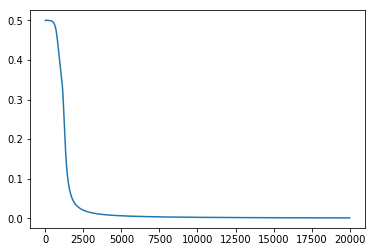

In [6]:
df = pd.DataFrame(training_step)
plt.plot(df['epoch'], df['error'])

In [7]:
predict(Input)

array([[0.00161676],
       [0.99886917],
       [0.99887088],
       [0.00116252]])

2.2) SUM-SQUARED FUNCTION FOR THE WHOLE BATCH

In [8]:
epoch = 20000
learning_rate = 0.1
HiddenWeight = np.random.uniform(size=(2,2))
HiddenBias = np.random.uniform(size=(1,2))
OutputWeight = np.random.uniform(size=(2,1))
OutputBias = np.random.uniform(size=(1,1))

In [9]:
training_step  = []
for i in range(epoch):
    
    HiddenLayer = np.dot(Input, HiddenWeight)
    HiddenLayer += HiddenBias
    Hidden_Layer_Output = sigmoid(HiddenLayer)

    OutputLayer = np.dot(Hidden_Layer_Output, OutputWeight)
    OutputLayer += OutputBias
    predicted = sigmoid(OutputLayer)
    
    error = (-Output + predicted)
    diff_output_error = error*diff_sigmoid(predicted)

    hidden_error = np.dot(diff_output_error,OutputWeight.T)
    diff_hidden_error = hidden_error*diff_sigmoid(Hidden_Layer_Output)

    OutputWeight = OutputWeight - np.dot(Hidden_Layer_Output.T,diff_output_error)*learning_rate
    OutputBias = OutputBias - np.sum(diff_output_error, axis=0, keepdims=True)*learning_rate

    HiddenWeight = HiddenWeight - np.dot(Input.T,diff_hidden_error, )*learning_rate
    HiddenBias = HiddenBias - np.sum(diff_hidden_error, axis=0, keepdims=True)*learning_rate 
    
    step = {}
    step['epoch'] = i
    step['error'] = np.mean(np.abs(-Output+ predict(Input)))
    training_step.append(step)
    

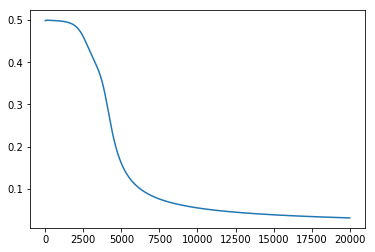

In [10]:
df = pd.DataFrame(training_step)
plt.plot(df['epoch'], df['error'])

In [11]:
predict(Input)

array([[0.0334525 ],
       [0.97042574],
       [0.9704256 ],
       [0.031078  ]])

2.3) LOG-LOSS FUNCTION FOR STOCHASTIC GRADIENT

In [12]:
epoch = 20000
learning_rate = 0.1
HiddenWeight = np.random.uniform(size=(2,2))
HiddenBias = np.random.uniform(size=(1,2))
OutputWeight = np.random.uniform(size=(2,1))
OutputBias = np.random.uniform(size=(1,1))

In [13]:
training_step  = []
for i in range(epoch):
    
    HiddenLayer = np.dot(np.array([Input[i%4]]), HiddenWeight)
    HiddenLayer += HiddenBias
    Hidden_Layer_Output = sigmoid(HiddenLayer)

    OutputLayer = np.dot(Hidden_Layer_Output, OutputWeight)
    OutputLayer += OutputBias
    predicted = sigmoid( OutputLayer)
    
    error = (-np.array([Output[i%4]]) + predicted)/(predicted*(1-predicted))
    diff_output_error = error*diff_sigmoid(predicted)

    hidden_error = np.dot(diff_output_error,OutputWeight.T)
    diff_hidden_error = hidden_error*diff_sigmoid(Hidden_Layer_Output)

    OutputWeight = OutputWeight - np.dot(Hidden_Layer_Output.T,diff_output_error)*learning_rate
    OutputBias = OutputBias - np.sum(diff_output_error, axis=0, keepdims=True)*learning_rate

    HiddenWeight = HiddenWeight - np.dot(np.array([Input[i%4]]).T,diff_hidden_error, )*learning_rate
    HiddenBias = HiddenBias - np.sum(diff_hidden_error, axis=0, keepdims=True)*learning_rate 
    
    step = {}
    step['epoch'] = i
    step['error'] = np.mean(np.abs(-Output+ predict(Input)))
    training_step.append(step)
    

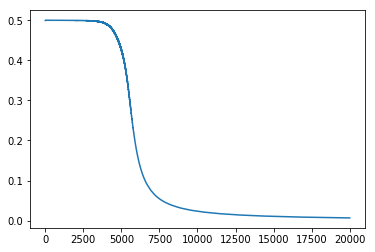

In [14]:
df = pd.DataFrame(training_step)
plt.plot(df['epoch'], df['error'])

In [15]:
predict(Input)

array([[0.00662457],
       [0.99112354],
       [0.99385678],
       [0.00564584]])

**2.4**) SUM-SQUARED FUNCTION FOR STOCHASTIC

In [16]:
epoch = 40000
learning_rate = 0.1
HiddenWeight = np.random.uniform(size=(2,2))
HiddenBias = np.random.uniform(size=(1,2))
OutputWeight = np.random.uniform(size=(2,1))
OutputBias = np.random.uniform(size=(1,1))

In [17]:
training_step  = []
for i in range(epoch):
    
    HiddenLayer = np.dot(np.array([Input[i%4]]), HiddenWeight)
    HiddenLayer += HiddenBias
    Hidden_Layer_Output = sigmoid(HiddenLayer)

    OutputLayer = np.dot(Hidden_Layer_Output, OutputWeight)
    OutputLayer += OutputBias
    predicted = sigmoid(OutputLayer)
    
    error = (-np.array([Output[i%4]]) + predicted)
    diff_output_error = error*diff_sigmoid(predicted)

    hidden_error = np.dot(diff_output_error,OutputWeight.T)
    diff_hidden_error = hidden_error*diff_sigmoid(Hidden_Layer_Output)

    OutputWeight = OutputWeight - np.dot(Hidden_Layer_Output.T,diff_output_error)*learning_rate
    OutputBias = OutputBias - np.sum(diff_output_error, axis=0, keepdims=True)*learning_rate

    HiddenWeight = HiddenWeight - np.dot(np.array([Input[i%4]]).T,diff_hidden_error, )*learning_rate
    HiddenBias = HiddenBias - np.sum(diff_hidden_error, axis=0, keepdims=True)*learning_rate 
    
    step = {}
    step['epoch'] = i
    step['error'] = np.mean(np.abs(-Output+ predict(Input)))
    training_step.append(step)
    

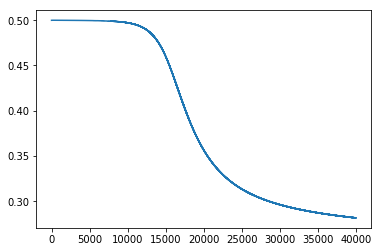

In [18]:
df = pd.DataFrame(training_step)
plt.plot(df['epoch'], df['error'])

In [19]:
predict(Input)

array([[0.05248268],
       [0.49274481],
       [0.93551775],
       [0.50209149]])